In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [416]:
df_train = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\train.csv')
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [417]:
df_train = df_train.replace("female", value= 0)
df_train = df_train.replace("male", value= 1)
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
median = df_train['Age'].median()
df_train['Age'].fillna(median, inplace=True)

In [418]:
replace_dict = {val: 1 for val in df_train['Cabin'] if isinstance(val, str)}

# Replace string values with 1
df_train['Cabin'] = df_train['Cabin'].replace(replace_dict)

# Convert column to numeric type
df_train['Cabin'] = pd.to_numeric(df_train['Cabin'])

df_train['Cabin'] = df_train['Cabin'].fillna(0)


In [419]:
aa = pd.get_dummies(df_train['Embarked'])
df2_train = pd.concat((df_train, aa), axis = 1)
df2_train = df2_train.drop('Embarked', axis = 1)

In [420]:
df_test = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\test.csv')

df_test = df_test.replace("female", value= 0)
df_test = df_test.replace("male", value= 1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
median = df_test['Age'].median()
df_test['Age'].fillna(median, inplace=True)

replace_dict = {val: 1 for val in df_test['Cabin'] if isinstance(val, str)}

# Replace string values with 1
df_test['Cabin'] = df_test['Cabin'].replace(replace_dict)

# Convert column to numeric type
df_test['Cabin'] = pd.to_numeric(df_test['Cabin'])

df_test['Cabin'] = df_test['Cabin'].fillna(0)

aa = pd.get_dummies(df_test['Embarked'])
df2_test = pd.concat((df_test, aa), axis = 1)
df2_test = df2_test.drop('Embarked', axis = 1)

x2 = df2_test

In [421]:
x = df2_train.drop('Survived', axis = 1)
y = df2_train['Survived']

In [422]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [423]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x2 = sc_X.fit_transform(x2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [424]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x_train, y_train)

print(f'The score for the train data is: {logistic.score(x_train,y_train)}')
print(f'The score for the test data is: {logistic.score(x_test,y_test)}')
print(f'Average precision:{round((logistic.score(x_train,y_train)+logistic.score(x_test,y_test))*100/2, 2)}% ')

The score for the train data is: 0.800561797752809
The score for the test data is: 0.8212290502793296
Average precision:81.09% 


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [425]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logistic.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [426]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)


0.1787709497206704

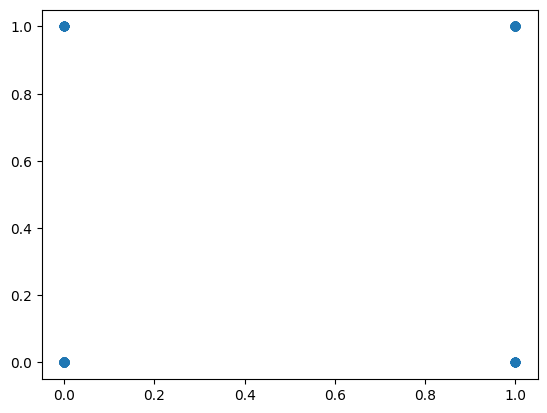

In [433]:
y_pred = logistic.predict(x_test)
plt.scatter(y_test,y_pred)